# More on Missing Data - Lab

## Introduction

In this lab, you'll continue to practice techniques for dealing with missing data. Moreover, you'll observe the impact on distributions of your data produced by various techniques for dealing with missing data.

## Objectives

In this lab you will: 

- Evaluate and execute the best strategy for dealing with missing, duplicate, and erroneous values for a given dataset   
- Determine how the distribution of data is affected by imputing values 

## Load the data

To start, load the dataset `'titanic.csv'` using pandas.

In [1]:
# Your code here
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('titanic.csv')

Use the `.info()` method to quickly preview which features have missing data

In [3]:
# Your code here
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1391 entries, 0 to 1390
Data columns (total 12 columns):
PassengerId    1391 non-null float64
Survived       1391 non-null float64
Pclass         1391 non-null object
Name           1391 non-null object
Sex            1391 non-null object
Age            1209 non-null float64
SibSp          1391 non-null float64
Parch          1391 non-null float64
Ticket         1391 non-null object
Fare           1391 non-null float64
Cabin          602 non-null object
Embarked       1289 non-null object
dtypes: float64(6), object(6)
memory usage: 130.5+ KB


## Observe previous measures of centrality

Let's look at the `'Age'` feature. Calculate the mean, median, and standard deviation of this feature. Then plot a histogram of the distribution.

In [4]:
# Your code here
age_mean = df.Age.mean()
age_median = df.Age.median()
age_std = df.Age.std()

print('age mean is {} '.format(age_mean))
print('age median is {} '.format(age_median))
print('age standard deviation is {} '.format(age_std))

age mean is 29.731894127378 
age median is 27.0 
age standard deviation is 16.0701246034447 


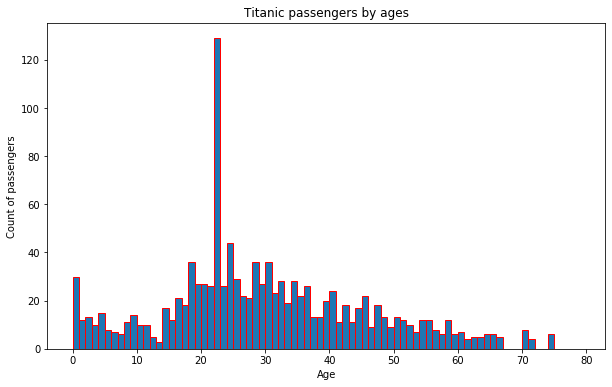

In [5]:
plt.figure(figsize=(10,6))
plt.title('Titanic passengers by ages')
plt.xlabel('Age')
plt.ylabel('Count of passengers')
plt.hist(df.Age,edgecolor='r',bins=range(80));
plt.show()

## Impute missing values using the mean 

Fill the missing `'Age'` values using the average age. (Don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

In [23]:
# Your code here
index_ages_nan = df[df.Age.isna() == True].index
ages = df.Age
ages.iloc[index_ages_nan] = age_mean

/opt/conda/envs/learn-env/lib/python3.6/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [25]:
ages.unique()

array([22.        , 38.        , 26.        , 35.        , 29.73189413,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       34.        , 15.        , 28.        ,  8.        , 19.        ,
       40.        , 66.        , 42.        , 21.        , 18.        ,
        3.        ,  7.        , 49.        , 29.        , 65.        ,
       28.5       ,  5.        , 11.        , 45.        , 17.        ,
       32.        , 16.        , 25.        ,  0.83      , 30.        ,
       33.        , 23.        , 24.        , 46.        , 59.        ,
       71.        , 37.        , 47.        , 14.5       , 70.5       ,
       32.5       , 12.        ,  9.        , 36.5       , 51.        ,
       55.5       , 40.5       , 44.        ,  1.        , 61.        ,
       56.        , 50.        , 36.        , 45.5       , 20.5       ,
       62.        , 41.        , 52.        , 63.        , 23.5 

In [26]:
ages_mean = ages.mean()
ages_median = ages.median()
ages_std = ages.std()

print('age mean is {} '.format(ages_mean))
print('age median is {} '.format(ages_median))
print('age standard deviation is {} '.format(ages_std))

age mean is 29.731894127377995 
age median is 29.731894127378 
age standard deviation is 14.98115547604539 


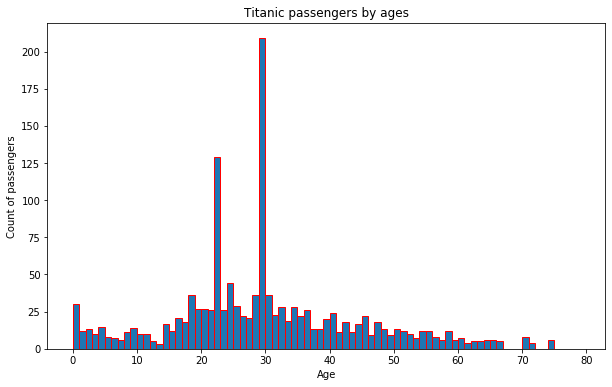

In [27]:
plt.figure(figsize=(10,6))
plt.title('Titanic passengers by ages')
plt.xlabel('Age')
plt.ylabel('Count of passengers')
plt.hist(ages,edgecolor='r',bins=range(80));
plt.show()

### Commentary

Note that the standard deviation dropped, the median was slightly raised and the distribution has a larger mass near the center.

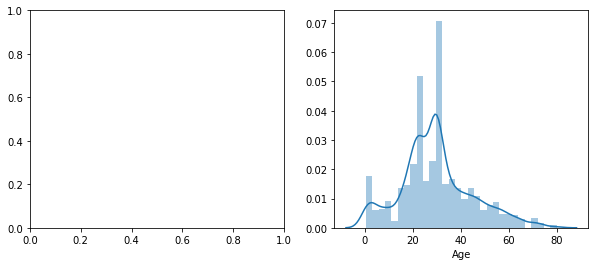

In [39]:
fig  = plt.figure(figsize=(10,4))
fig.subplots(ncols=2,nrows=1)
sns.distplot(ages);
plt.show()

In [47]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(rows=1, cols=2,subplot_titles=['Ages before altering data', 'Ages after changing nans to the mean'])

fig.add_trace(
    go.Histogram(x=df.Age),
    row=1, col=1
)

fig.add_trace(
    go.Histogram(x=ages),
    row=1, col=2,
)

fig.update_layout(height=600, width=800, title_text="Subplots")
fig.show()

## Impute missing values using the median 

Fill the missing `'Age'` values, this time using the media age. (Again, don't overwrite the original data, as we will be comparing to other methods for dealing with the missing values.) Then recalculate the mean, median, and std and replot the histogram.

In [ ]:
# Your code here


### Commentary

Imputing the median has similar effectiveness to imputing the mean. The variance is reduced, while the mean is slightly lowered. You can once again see that there is a larger mass of data near the center of the distribution.

## Dropping rows

Finally, let's observe the impact on the distribution if we were to simply drop all of the rows that are missing an age value. Then, calculate the mean, median and standard deviation of the ages along with a histogram, as before.

In [ ]:
# Your code here


### Commentary

Dropping missing values leaves the distribution and associated measures of centrality unchanged, but at the cost of throwing away data.

## Summary

In this lab, you briefly practiced some common techniques for dealing with missing data. Moreover, you observed the impact that these methods had on the distribution of the feature itself. When you begin to tune models on your data, these considerations will be an essential process of developing robust and accurate models.